<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> <h1>Causal Inference In Statistics - A Primer</h1>
        <p><a href="https://www.amazon.com/gp/product/1119186846/ref=as_li_tl?ie=UTF8&camp=1789&creative=9325&creativeASIN=1119186846&linkCode=as2&tag=data4sci03-20&linkId=d1024744ce52d40d760353df4cec3d63" target=_blank>Amazon Link</a></p>
<h2>1.2 Simpson's Paradox</h2>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import watermark

%load_ext watermark
%matplotlib inline

In [2]:
%watermark -i -n -v -m -g -iv

watermark  1.8.1
pandas     0.24.2
matplotlib 3.1.0
numpy      1.16.2
Sun Feb 02 2020 2020-02-02T10:49:11-05:00

CPython 3.7.3
IPython 6.2.1

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 19.2.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit
Git hash   : 1ae50e0d1a39ec9a0d3f7a7eea7dd681ead3f16c


In [3]:
plt.style.use('./d4sci.mplstyle')

# Load the iris dataset 

In [4]:
iris = pd.read_csv('data/iris.csv')

Split the dataset across species for convenience

In [5]:
setosa = iris[['sepal_width', 'petal_width']][iris['species'] == 'setosa']
versicolor = iris[['sepal_width', 'petal_width']][iris['species'] == 'versicolor']
virginica = iris[['sepal_width', 'petal_width']][iris['species'] == 'virginica']

# Perform the fits

In [6]:
lm_setosa = LinearRegression()
lm_setosa.fit(setosa['sepal_width'].values.reshape(-1,1), setosa['petal_width'])
y_setosa = lm_setosa.predict(setosa['sepal_width'].values.reshape(-1,1))

lm_versicolor = LinearRegression()
lm_versicolor.fit(versicolor['sepal_width'].values.reshape(-1,1), versicolor['petal_width'])
y_versicolor = lm_versicolor.predict(versicolor['sepal_width'].values.reshape(-1,1))

lm_virginica = LinearRegression()
lm_virginica.fit(virginica['sepal_width'].values.reshape(-1,1), virginica['petal_width'])
y_virginica = lm_virginica.predict(virginica['sepal_width'].values.reshape(-1,1))

lm_full = LinearRegression()
lm_full.fit(iris['sepal_width'].values.reshape(-1,1), iris['petal_width'])
y_full = lm_full.predict(iris['sepal_width'].values.reshape(-1,1))

# Generate the plot

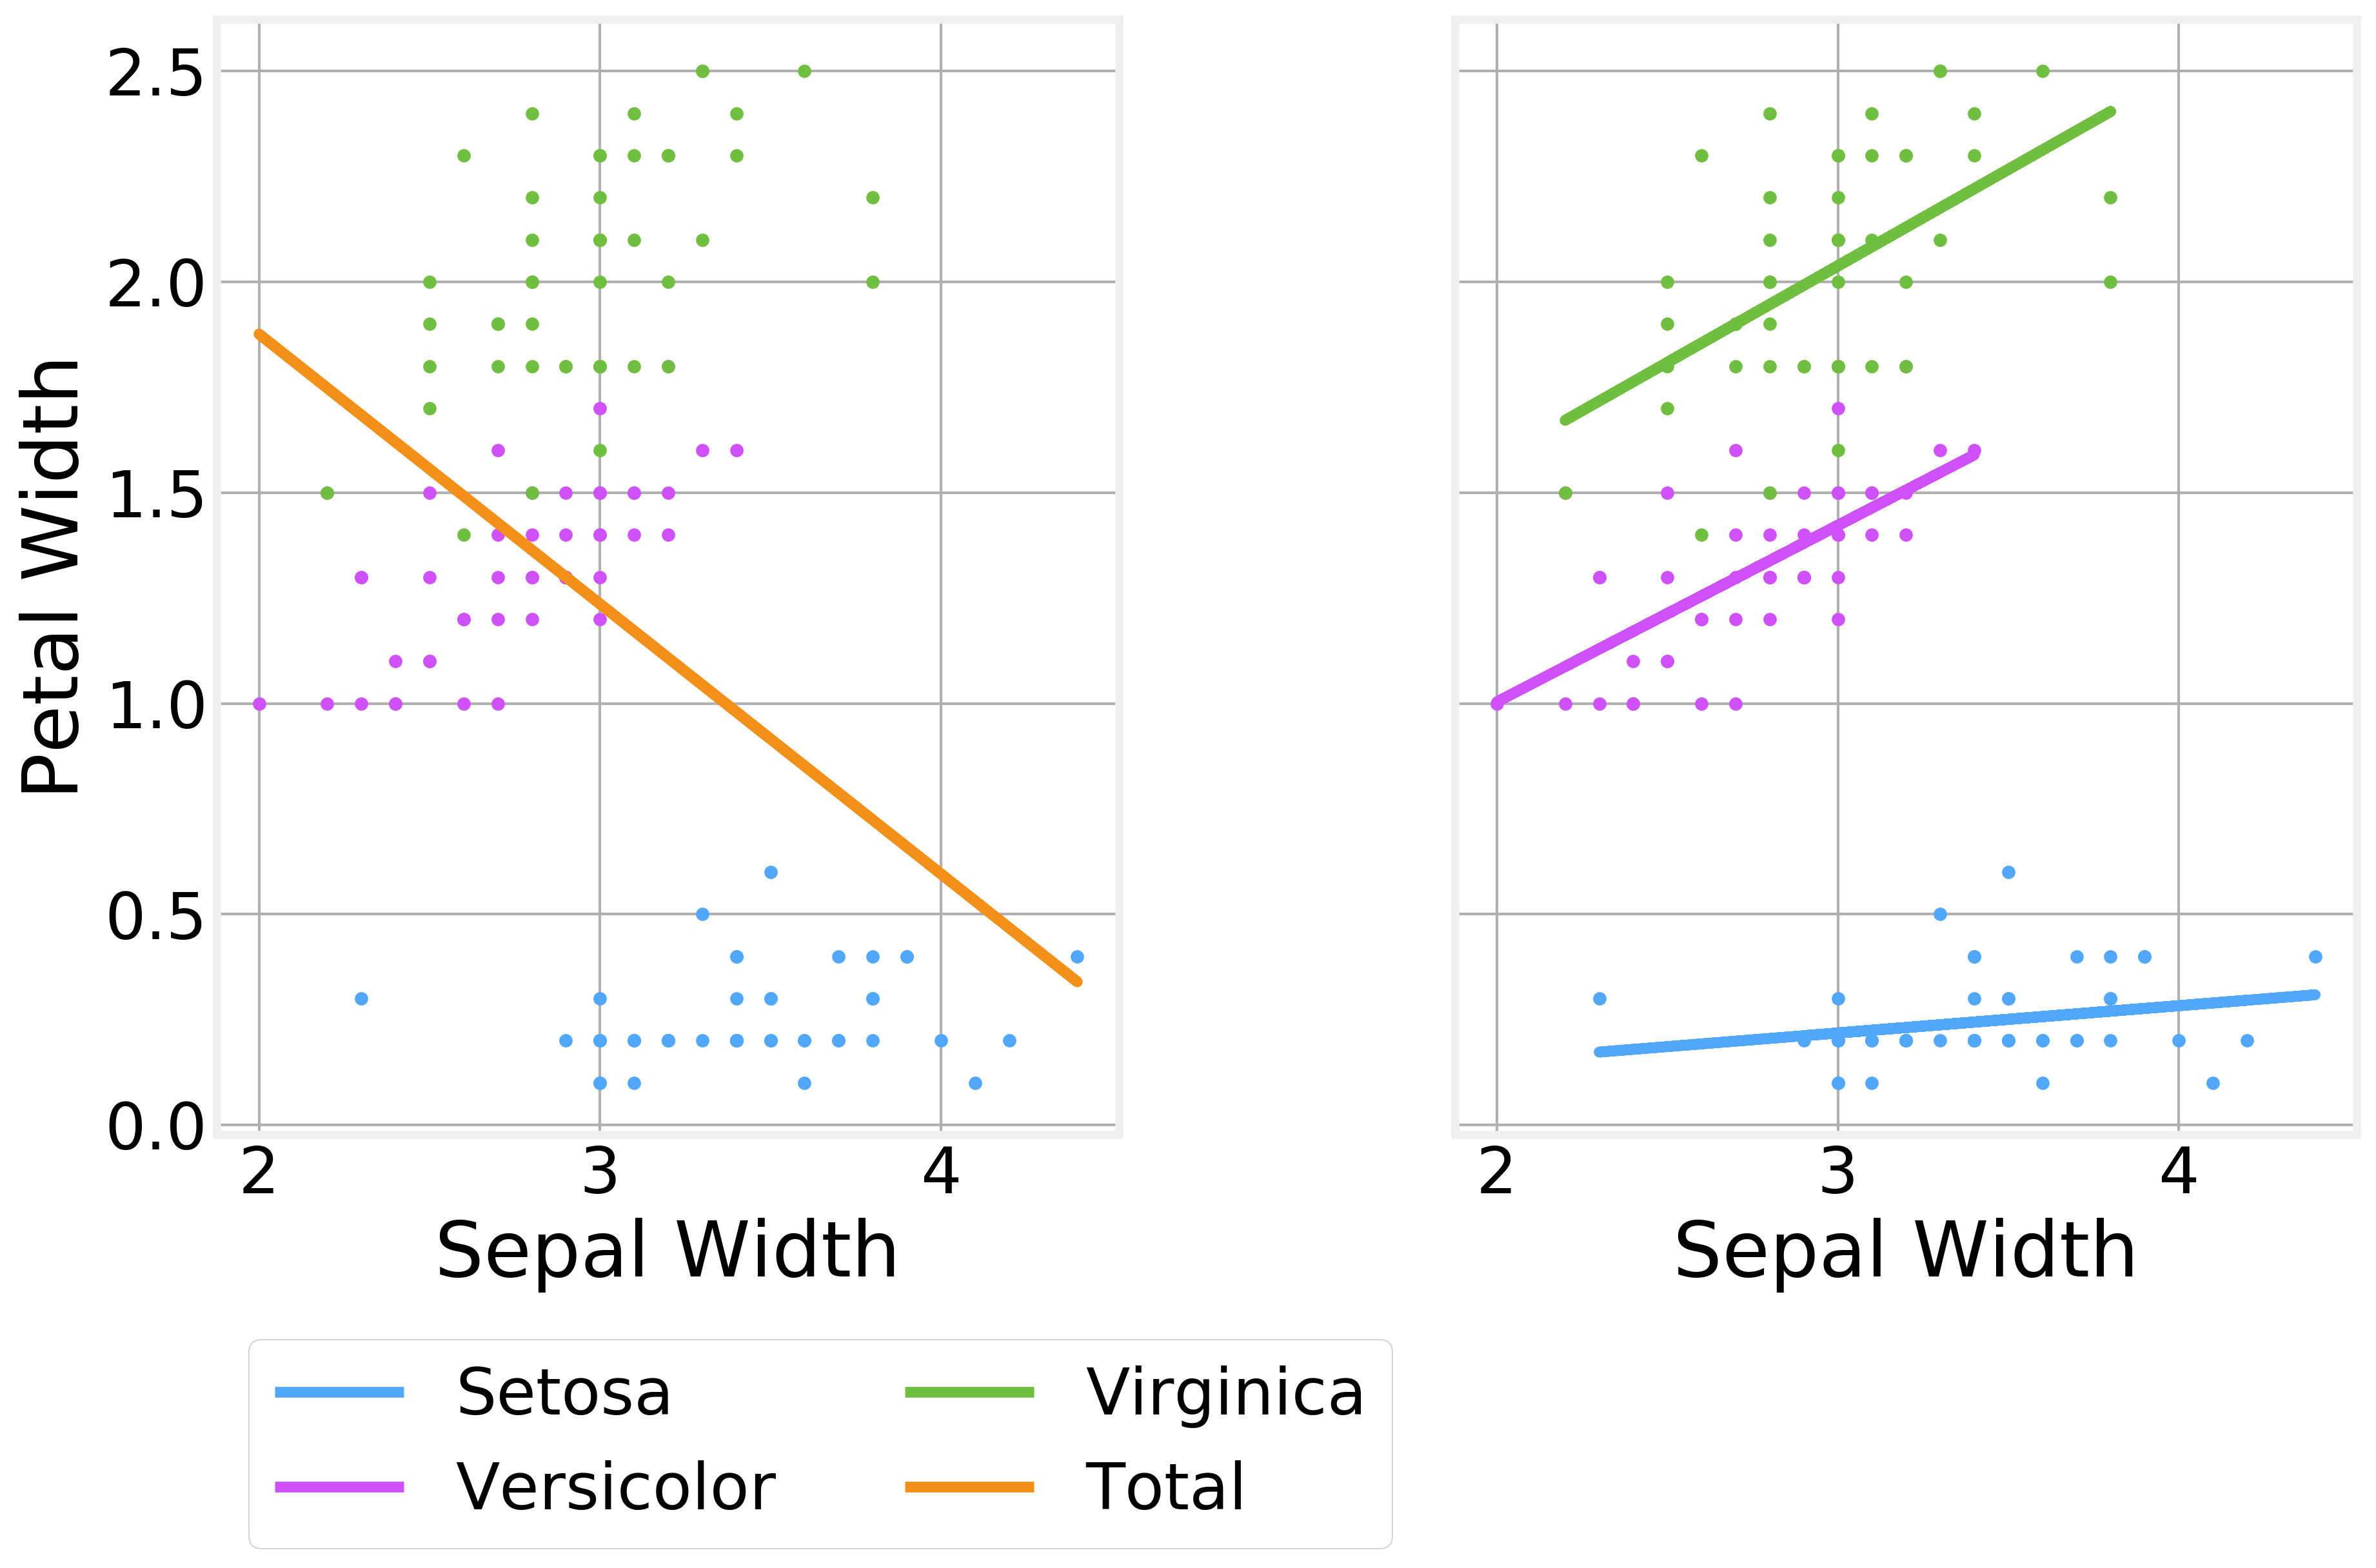

In [7]:
fig, axs = plt.subplots(ncols=2, sharey=True)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

setosa.plot.scatter(x='sepal_width', y='petal_width', label='setosa', ax=axs[0], c=colors[0])
versicolor.plot.scatter(x='sepal_width', y='petal_width', label='versicolor', ax=axs[0], c=colors[1])
virginica.plot.scatter(x='sepal_width', y='petal_width', label='virginica', ax=axs[0], c=colors[2])
l4, = axs[0].plot(iris['sepal_width'].values.reshape(-1,1), y_full, '-', c=colors[3])

setosa.plot.scatter(x='sepal_width', y='petal_width', ax=axs[1], c=colors[0])
versicolor.plot.scatter(x='sepal_width', y='petal_width', ax=axs[1], c=colors[1])
virginica.plot.scatter(x='sepal_width', y='petal_width', ax=axs[1], c=colors[2])

l1, = axs[1].plot(setosa['sepal_width'].values.reshape(-1,1), y_setosa, '-', c=colors[0])
l2, = axs[1].plot(versicolor['sepal_width'].values.reshape(-1,1), y_versicolor, '-', c=colors[1])
l3, = axs[1].plot(virginica['sepal_width'].values.reshape(-1,1), y_virginica, '-', c=colors[2])

axs[0].set_xlabel('Sepal Width')
axs[1].set_xlabel('Sepal Width')
axs[0].set_ylabel('Petal Width')

fig.subplots_adjust(bottom=0.3, wspace=0.33)

axs[0].legend(handles = [l1, l2, l3, l4] , labels=['Setosa', 'Versicolor', 'Virginica', 'Total'],
             loc='lower left', bbox_to_anchor=(0, -0.4), ncol=2, fancybox=True, shadow=False)

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>